# Medical Cost Personal Insurance Project


Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            
•	age: age of primary beneficiary  
•	sex: insurance contractor gender, female, male  
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,  objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.  
•	children: Number of children covered by health insurance / Number of dependents  
•	smoker: Smoking  
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.  
•	charges: Individual medical costs billed by health insurance  
  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('medical_cost_insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analasys

Missing Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicate values

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()==True]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1337, 7)

Data Types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Unique Values

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Statistical Values

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Numerical and Categorical Features

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
target = "charges"

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

print("\nCategories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']
We have 3 categorical features : ['sex', 'smoker', 'region']

Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']


Adding columns

In [16]:
# Adding an age_range categorical column where ages between 0-30 are considered 'young', 31-60 are considered 'middle-aged', and 61-100 are considered as 'old'
df['age_range'] = 'old'
df.loc[(df['age'] > 0) & (df['age'] <= 30), 'age_range'] = 'young'
df.loc[(df['age'] > 30) & (df['age'] <= 60), 'age_range'] = 'middle-aged'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged


In [17]:
# Adding a bmi_range categorical column where bmi <18.5 falls under underweight range, 18.5 - 24.9 falls under normal range, 25.0 - 29.9 falls under overweight range, and >30.0 falls under obese range
df['bmi_range'] = 'normal'
df.loc[(df['bmi'] < 18.5), 'bmi_range'] = 'underweight'
df.loc[(df['bmi'] > 25.0) & (df['bmi'] < 29.9), 'bmi_range'] = 'overweight'
df.loc[(df['bmi'] > 30.0), 'bmi_range'] = 'obese'
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


In [18]:
df.value_counts(['sex'])

sex   
male      675
female    662
Name: count, dtype: int64

In [19]:
df.value_counts(['sex','age_range'])

sex     age_range  
male    middle-aged    402
female  middle-aged    401
male    young          229
female  young          214
        old             47
male    old             44
Name: count, dtype: int64

In [20]:
df.value_counts(['sex','smoker'])

sex     smoker
female  no        547
male    no        516
        yes       159
female  yes       115
Name: count, dtype: int64

In [21]:
df.value_counts(['region'])

region   
southeast    364
southwest    325
northeast    324
northwest    324
Name: count, dtype: int64

In [22]:
df.value_counts(['region','smoker'])

region     smoker
southeast  no        273
southwest  no        267
northwest  no        266
northeast  no        257
southeast  yes        91
northeast  yes        67
northwest  yes        58
southwest  yes        58
Name: count, dtype: int64

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


# Analysis and Visualizations

1) What percent of young people are overweight and obese?

In [25]:
# Analysis
young_df = df[df['age_range'] == 'young']
young_overweight_percent = (young_df[young_df['bmi_range'] == 'overweight']['age_range'].count() / len(young_df)) * 100
young_obese_percent = (young_df[young_df['bmi_range'] == 'obese']['age_range'].count() / len(young_df)) * 100
young_normal_percent = (young_df[young_df['bmi_range'] == 'normal']['age_range'].count() / len(young_df)) * 100
young_underweight_percent = (young_df[young_df['bmi_range'] == 'underweight']['age_range'].count() / len(young_df)) * 100

print("Young people percentage that are overweight: {}%".format(round(young_overweight_percent,2)))
print("Young people percentage that are obese: {}%".format(round(young_obese_percent,2)))
print("Young people percentage that are normal: {}%".format(round(young_normal_percent,2)))
print("Young people percentage that are underweight: {}%".format(round(young_underweight_percent,2)))

Young people percentage that are overweight: 26.86%
Young people percentage that are obese: 48.76%
Young people percentage that are normal: 21.9%
Young people percentage that are underweight: 2.48%


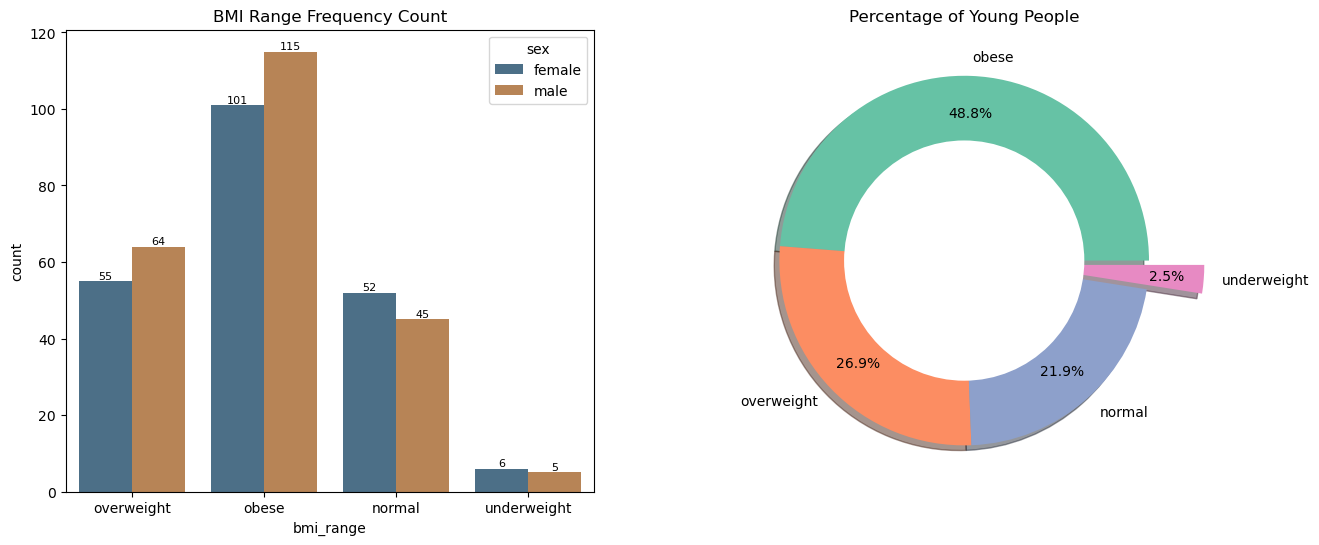

In [26]:
# Visualization
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(young_df, x='bmi_range', hue='sex', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
plt.title("Percentage of Young People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

2) What percent of middle-aged and old people are normal?

In [27]:
# Analysis
not_young_df = df[df['age_range'].isin(['middle-aged','old'])]

not_young_overweight_percent = (not_young_df[not_young_df['bmi_range'] == 'overweight']['age_range'].count() / len(not_young_df)) * 100
not_young_obese_percent = (not_young_df[not_young_df['bmi_range'] == 'obese']['age_range'].count() / len(not_young_df)) * 100
not_young_normal_percent = (not_young_df[not_young_df['bmi_range'] == 'normal']['age_range'].count() / len(not_young_df)) * 100
not_young_underweight_percent = (not_young_df[not_young_df['bmi_range'] == 'underweight']['age_range'].count() / len(not_young_df)) * 100

print("Young people percentage that are overweight: {}%".format(round(not_young_overweight_percent,2)))
print("Young people percentage that are obese: {}%".format(round(not_young_obese_percent,2)))
print("Young people percentage that are normal: {}%".format(round(not_young_normal_percent,2)))
print("Young people percentage that are underweight: {}%".format(round(not_young_underweight_percent,2)))

Young people percentage that are overweight: 28.3%
Young people percentage that are obese: 54.59%
Young people percentage that are normal: 16.11%
Young people percentage that are underweight: 1.01%


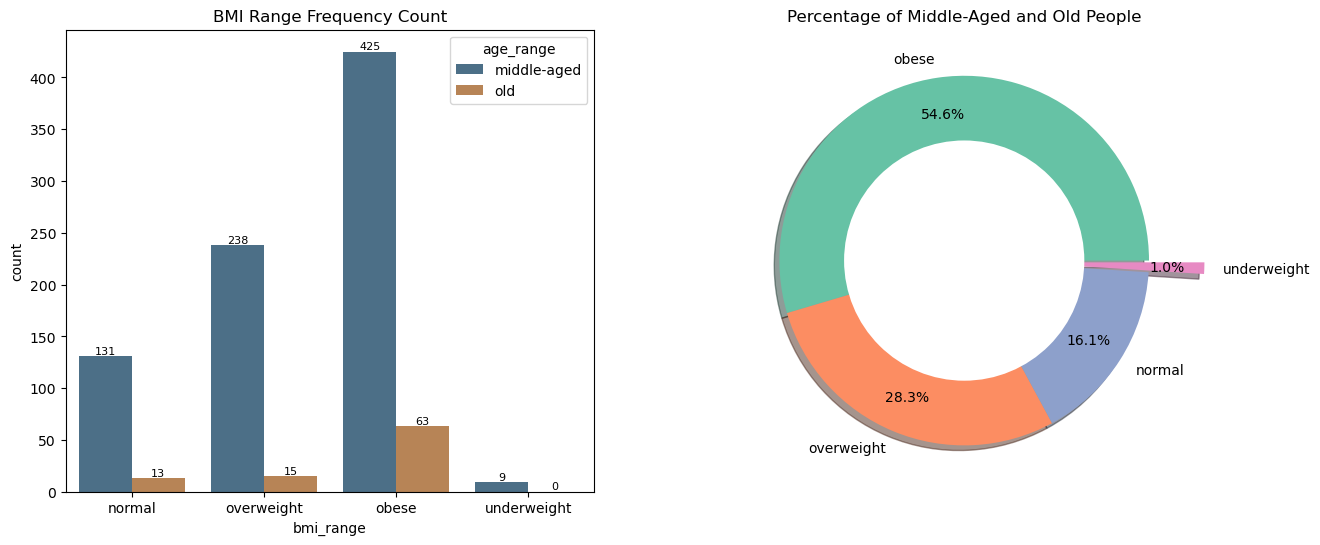

In [28]:
# Visualization
f, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot(not_young_df, x='bmi_range', hue='age_range', ax=ax[0], saturation=0.4)
for container in ax[0].containers:
    ax[0].bar_label(container, size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=not_young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],autopct='%1.1f%%',
        explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
plt.title("Percentage of Middle-Aged and Old People")

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

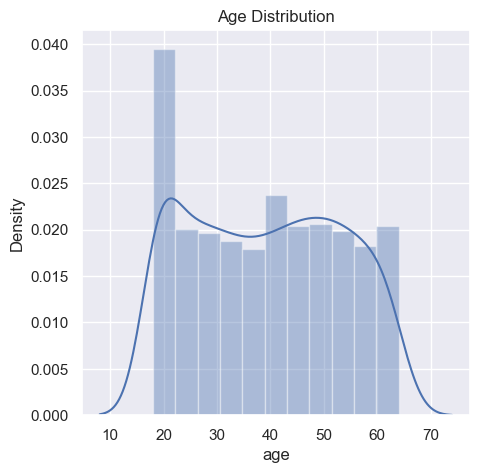

In [31]:
#distribution of age values
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

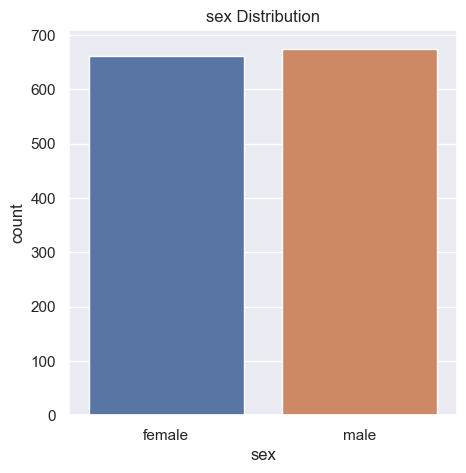

In [33]:
#gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.title('sex Distribution')
plt.show()

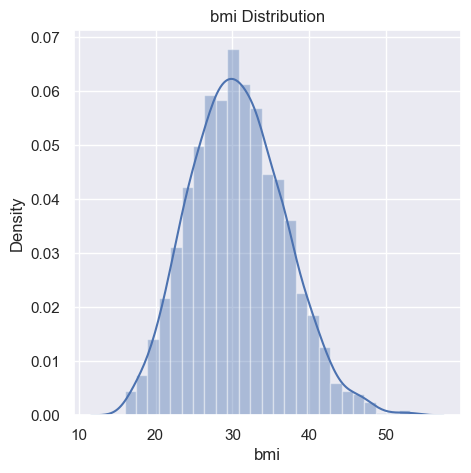

In [34]:
#distribution of bmi values
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

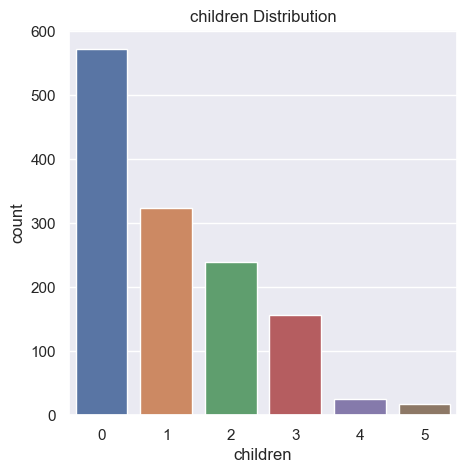

In [35]:
#children column
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=df)
plt.title('children Distribution')
plt.show()

In [36]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

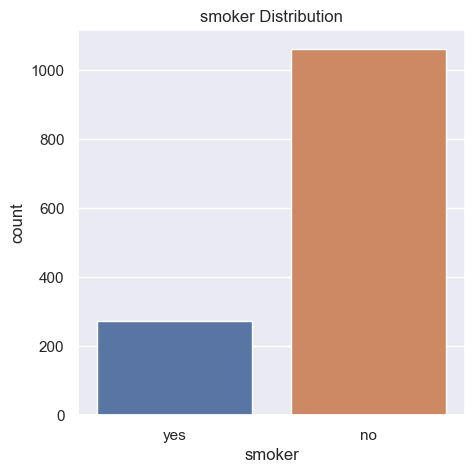

In [37]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('smoker Distribution')
plt.show()

In [38]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

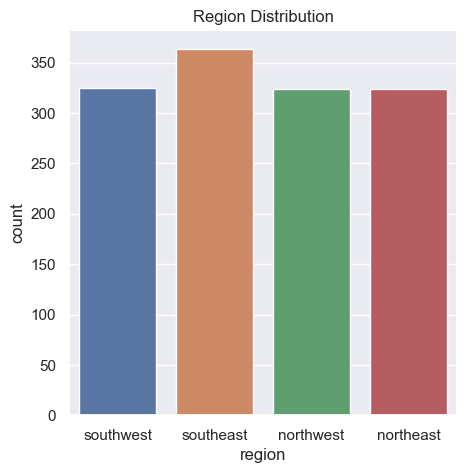

In [39]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()

In [40]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

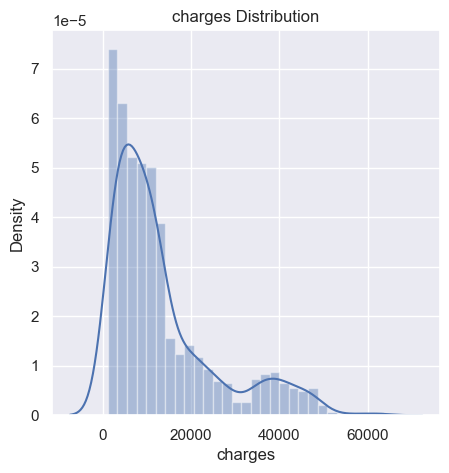

In [41]:
#distribution of charges values
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

Encoding the categorical feauters

In [42]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)


#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [43]:
df

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,1,27.900,0,0,1,16884.92400,young,overweight
1,18,0,33.770,1,1,0,1725.55230,young,obese
2,28,0,33.000,3,1,0,4449.46200,young,obese
3,33,0,22.705,0,1,3,21984.47061,middle-aged,normal
4,32,0,28.880,0,1,3,3866.85520,middle-aged,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830,middle-aged,obese
1334,18,1,31.920,0,1,2,2205.98080,young,obese
1335,18,1,36.850,0,1,0,1629.83350,young,obese
1336,21,1,25.800,0,1,1,2007.94500,young,overweight


In [44]:
# Excluding age_range and bmi_range
X1 = df.drop(columns=['age_range', 'bmi_range'], axis=1)


In [47]:
X1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the features and targets

In [48]:
X=X1.drop(columns='charges',axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [50]:
Y=df['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

Splitting the data into training data and testing data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [52]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 6) (1069, 6) (268, 6)


Module Training

In this project iam using linear regression module because i have used other modules in the previous practice project


In [54]:
from sklearn.linear_model import LinearRegression
#loading the linear regression module
regressor=LinearRegression()

In [55]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [56]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [60]:
#R squared value
from sklearn import metrics
R2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Value:',R2_train)

R Squared Value: 0.7584123253312958


Building a Predictive system

In [70]:
input_values=(19,1,27.900,0,0,1)
#changing input data to numpy array
num_data=np.asarray(input_values)
#reshape the array
input_reshape=num_data.reshape(1,-1)

prediction=regressor.predict(input_reshape)
print(prediction)

[25569.44666071]
